<a href="https://colab.research.google.com/github/carvalheirafc/deep_learning_stuff/blob/master/neural_networks/diabetes/task3/results_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics


In [2]:
file_url = 'https://raw.githubusercontent.com/carvalheirafc/deep_learning_stuff/master/neural_networks/diabetes/task3/diabetes_prediciton.csv'
results = pd.read_csv(file_url)
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
Unnamed: 0    31 non-null int64
Resposta      31 non-null float64
Target        31 non-null float64
dtypes: float64(2), int64(1)
memory usage: 824.0 bytes


In [3]:
results.reset_index(drop=True,inplace=True)
results.dropna(inplace=True)
results.head()


,Unnamed: 0,Resposta,Target
0,0,0.340001,0.0
1,1,0.037721,0.0
2,2,0.127217,0.0
3,3,0.049010,0.0
4,4,0.816236,1.0


In [0]:
target_positive = results[results['Target'] == 1]
target_negative = results[results['Target'] == 0]

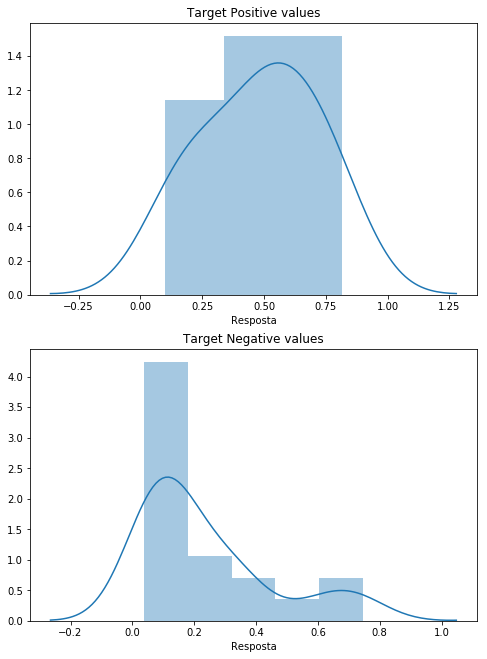

In [5]:
fig, ax = plt.subplots(2, 1, figsize=(8, 11))

ax_1 = sns.distplot(target_positive['Resposta'], ax=ax[0])
ax_1.set_title('Target Positive values')


ax_2 = sns.distplot(target_negative['Resposta'], ax=ax[1])
ax_2.set_title('Target Negative values')

plt.plot()
plt.show()

In [0]:
def get_positive(tresh_hold = 0.5):
  true_positive = target_positive[target_positive['Resposta'] >= tresh_hold]
  false_positive = target_positive[target_positive['Resposta'] < tresh_hold] 
  
  return len(true_positive), len(false_positive)

In [0]:
def get_negative(tresh_hold = 0.5):
  true_negative = target_negative[target_negative['Resposta'] <= tresh_hold]
  false_negative = target_negative[target_negative['Resposta'] > tresh_hold] 
  
  return len(true_negative), len(false_negative)

In [0]:
'''
Calculates:
Acuracy
Positive and Negative Precision
False Positive and False Negative Amount

@param true_positive amount of True Positive in the dataset.
@oaran true_negative amount of True Negative in the dataset.
@param false_positive amount of False Positive in the dataset.
@param false_negative amount of False Negative in the dataset.
@param positives Total of Positives targets, targets = 1
@param negatives Total of Negatives targets, targets = 0
@param Threshold Value used to calc the true, false positives and negatives
@param debug Default False, if True print all stats

'''
def calc_stats(true_positive, 
               true_negative, 
               false_positive, 
               false_negative, 
               positives, 
               negatives, 
               threshold, 
               debug=False):
  
  acuracy = (true_positive + true_negative)/ (positives + negatives)

  precision_positive = true_positive / (true_positive + false_positive)
  precision_negative = true_negative / (true_negative + false_negative)

  false_positive_amount = false_positive / negatives
  false_negative_amount = false_negative / positives
  if debug == True:
    print('Threshold: '+str(threshold))
    print('Accuracy: '+str(acuracy))
    print('Positive Precision: '+str(precision_positive))
    print('Negative Precision: '+str(precision_negative))
    print('Amount False Positives: '+str(false_positive_amount))
    print('Amount False Negatives: '+str(false_negative_amount))
    print('\n')
  
  return acuracy


In [9]:
threshold = [0.0, 
             0.1, 0.2, 
             0.3, 0.4, 
             0.5, 0.6,
             0.7, 0.8,
             0.9, 1.0]

for t in threshold:
  true_positive, false_positive = get_positive(t)
  true_negative, false_negative = get_negative(t)

  
  calc_stats(true_positive, 
             true_negative, 
             false_positive, 
             false_negative, 
             len(target_positive), 
             len(target_negative),
             t, True)
  

Threshold: 0.0
Accuracy: 0.3548387096774194
Positive Precision: 1.0
Negative Precision: 0.0
Amount False Positives: 0.0
Amount False Negatives: 1.8181818181818181


Threshold: 0.1
Accuracy: 0.5483870967741935
Positive Precision: 0.9090909090909091
Negative Precision: 0.35
Amount False Positives: 0.05
Amount False Negatives: 1.1818181818181819


Threshold: 0.2
Accuracy: 0.7419354838709677
Positive Precision: 0.9090909090909091
Negative Precision: 0.65
Amount False Positives: 0.05
Amount False Negatives: 0.6363636363636364


Threshold: 0.3
Accuracy: 0.7096774193548387
Positive Precision: 0.7272727272727273
Negative Precision: 0.7
Amount False Positives: 0.15
Amount False Negatives: 0.5454545454545454


Threshold: 0.4
Accuracy: 0.7741935483870968
Positive Precision: 0.6363636363636364
Negative Precision: 0.85
Amount False Positives: 0.2
Amount False Negatives: 0.2727272727272727


Threshold: 0.5
Accuracy: 0.7419354838709677
Positive Precision: 0.5454545454545454
Negative Precision: 0.85
A

In [0]:
tresh_hold = []
for it in results['Resposta']:
  if it <= 0.7:
     tresh_hold.append(0)
  else:
     tresh_hold.append(1)
      

matrix_cf = pd.DataFrame(metrics.confusion_matrix(results['Target'], tresh_hold), 
                         index=['Negative', 'Positive'],
                         columns=['True', 'False'])

Text(0.5, 1.0, 'Consfuison Matrix')

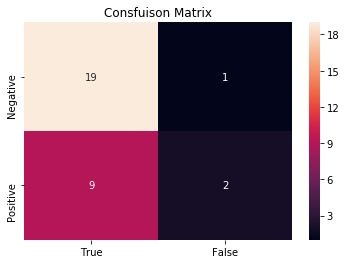

In [11]:
fig, ax = plt.subplots()
ax = sns.heatmap(matrix_cf, annot=True)
ax.set_title('Consfuison Matrix')

In [0]:
y = results['Target']
scores = results['Resposta']
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

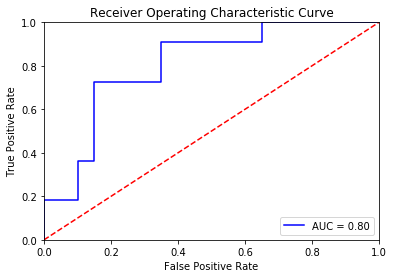

In [13]:
plt.title('Receiver Operating Characteristic Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()